In [1]:
import imageio
import matplotlib
import numpy as np
from PIL import Image
from matplotlib import cm
from scipy import ndimage
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [2]:
def set_fontsize(ax, fs):
    ax.title.set_fontsize(fs*1.3)
    ax.xaxis.label.set_fontsize(fs)
    ax.yaxis.label.set_fontsize(fs)
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.tick_params(axis='both', which='minor', labelsize=fs/1.25)

# Thorlabs BC106N-UV

Beamprofile of the cylindrically expanded beam for rotational cooling.

<img style="float: left;" src="cylindrical_expanded_beamprofile_2dprojection_#001.bmp">

In [3]:
def transformation(coordinates, im, scale):
    return -(coordinates[0] - im.shape[0]//2)*scale,\
           (coordinates[1] - im.shape[1]//2)*scale

In [4]:
im = imageio.imread('cylindrical_expanded_beamprofile_#001.bmp')[:,:,0]
# center_of_mass = ndimage.measurements.center_of_mass(im)
center_of_mass = np.array(np.where(im == im.max())).flatten()

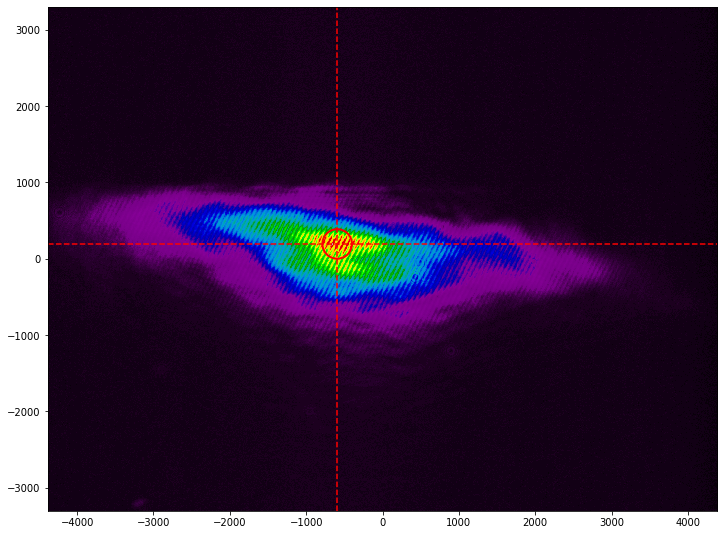

In [5]:
com = plt.Circle(transformation(center_of_mass, im, 6.45)[::-1], 30*6.45, edgecolor = 'r', fill = False, linewidth = 2)
fig, ax = plt.subplots(figsize = (12,12))
ax.imshow(im, aspect = 'equal', extent = np.array([-im.shape[1]//2, im.shape[1]//2, -im.shape[0]//2, im.shape[0]//2])*6.45,
          cmap = 'nipy_spectral')
ax.add_artist(com)
ax.axhline(transformation(center_of_mass, im, 6.45)[0], color = 'r', linestyle = '--')
ax.axvline(transformation(center_of_mass, im, 6.45)[1], color = 'r', linestyle = '--');

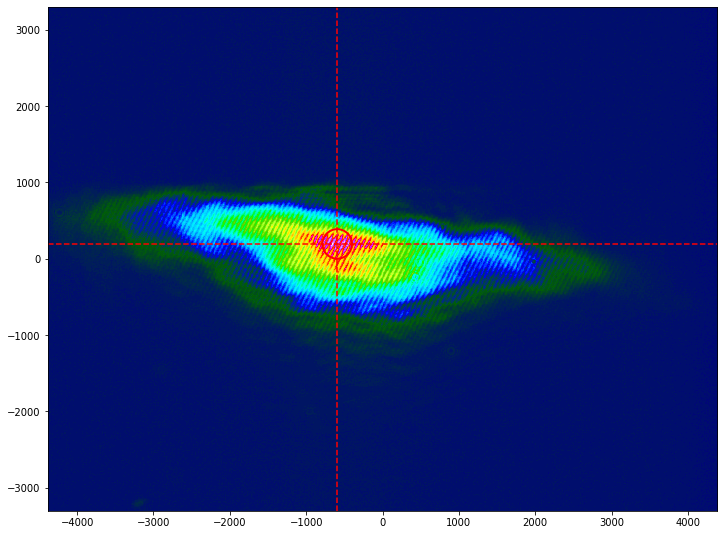

In [6]:
com = plt.Circle(transformation(center_of_mass, im, 6.45)[::-1], 30*6.45, edgecolor = 'r', fill = False, linewidth = 2)
fig, ax = plt.subplots(figsize = (12,12))
ax.imshow(im, aspect = 'equal', extent = np.array([-im.shape[1]//2, im.shape[1]//2, -im.shape[0]//2, im.shape[0]//2])*6.45,
          cmap = 'gist_ncar')
ax.add_artist(com)
ax.axhline(transformation(center_of_mass, im, 6.45)[0], color = 'r', linestyle = '--')
ax.axvline(transformation(center_of_mass, im, 6.45)[1], color = 'r', linestyle = '--');

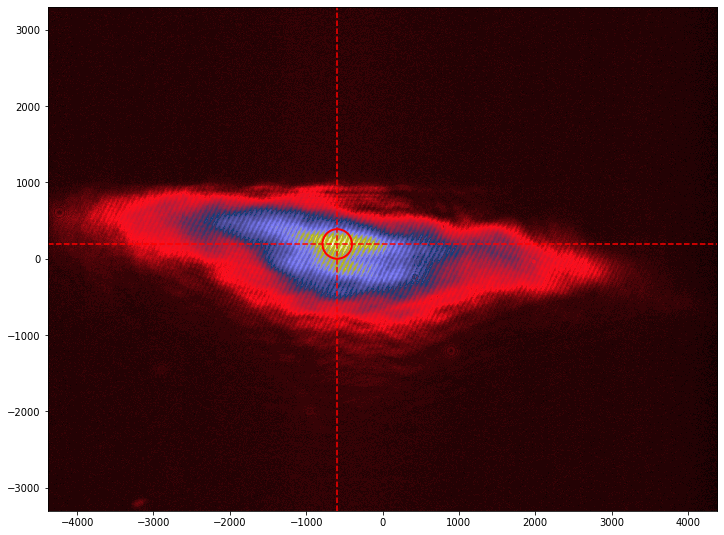

In [7]:
com = plt.Circle(transformation(center_of_mass, im, 6.45)[::-1], 30*6.45, edgecolor = 'r', fill = False, linewidth = 2)
fig, ax = plt.subplots(figsize = (12,12))
ax.imshow(im, aspect = 'equal', extent = np.array([-im.shape[1]//2, im.shape[1]//2, -im.shape[0]//2, im.shape[0]//2])*6.45,
          cmap = 'gist_stern')
ax.add_artist(com)
ax.axhline(transformation(center_of_mass, im, 6.45)[0], color = 'r', linestyle = '--')
ax.axvline(transformation(center_of_mass, im, 6.45)[1], color = 'r', linestyle = '--');

In [8]:
def plot_BCN106N(im, scaling, scale_xy = 6.45, scale_z = None, units_xy = '$\mu$m', units_z = None, normed_y = True,
                 origin_center = True):
    """
    Plot beamprofile taken with Thorlabs BCN106N camera
    
    Parameters:
    im             : 2D numpy array of beam profiler image
    scaling        : total scaling of the figure
    scale_xy       : scaling of pixels in xy plane to the specified xy units
    scale_z        : scaling of color values to the specified z units
    units_xy       : units of x,y coordinates
    units_z        : units of color values
    normed_y       : normalize color values if True
    origin_center  : set origin to middle of image if True
    
    """

    def transformation(coordinates, im, scale, origin_center):
        if origin_center:
            return -(coordinates[0] - im.shape[0]//2)*scale,\
                   (coordinates[1] - im.shape[1]//2)*scale
        else:
            return (im.shape[0]-coordinates[0])*scale, coordinates[1]*scale
    
    def gaussian(x, a, mu, sigma):
        return a*np.exp(-(x-mu)**2/(2*sigma**2))
    
    def set_fontsize(ax, fs):
        ax.title.set_fontsize(fs*1.3)
        ax.xaxis.label.set_fontsize(fs)
        ax.yaxis.label.set_fontsize(fs)
        ax.tick_params(axis='both', which='major', labelsize=fs)
        ax.tick_params(axis='both', which='minor', labelsize=fs/1.25)

    # finding the center of the beam spot
    center_peak = np.array(np.where(im == im.max())).flatten()
    curve_x = im[center_peak[0], :]
    curve_y = im[:,center_peak[1]][::-1]
    
    # transforming the center of the peak into the coordinates used for the plot
    center_peak = transformation(center_peak, im, scale_xy, origin_center)
    
    # normalizing or scaling z
    if normed_y:
        curve_x = curve_x/im.max()
        curve_y = curve_y/im.max()
    elif not isinstance(y_scale, type(None)):
        curve_x *= scale_z
        curve_y *= scale_z
           
    
    w, h = matplotlib.figure.figaspect(im.shape[1]/im.shape[0])*scaling
    fig = plt.figure(figsize=(h,w+0.11*scaling))
    gs = fig.add_gridspec(nrows = 12, ncols = 12, wspace = 0, hspace = 0)

    # Define the positions of the subplots.
    ax0 = fig.add_subplot(gs[2:12, :10])
    axx = fig.add_subplot(gs[:2, :10], sharex = ax0)
    axy = fig.add_subplot(gs[2:12, 10:12], sharey = ax0)
    
    # making tick marks on side plots with projections invisible
    axx.get_xaxis().set_visible(False)
    axy.get_yaxis().set_visible(False)
    
    # extent for imshow to transfrom pixels into specified units
    if origin_center:
        extent = np.array([-im.shape[1]//2, im.shape[1]//2, -im.shape[0]//2, im.shape[0]//2])*scale_xy
    else:
        extent = np.array([0,im.shape[1], 0, im.shape[0]])*scale_xy
        
    img = ax0.imshow(im, aspect = 'equal', extent = extent, cmap = 'gist_stern')
    
    # plotting circle and lines to indicate center of the peak
    com = plt.Circle(center_peak[::-1], 0.03*im.shape[0]*scale_xy, edgecolor = 'w', fill = False, linewidth = 2)
    ax0.axhline(center_peak[0], color = 'w', linestyle = '--')
    ax0.axvline(center_peak[1], color = 'w', linestyle = '--')
    ax0.add_artist(com)

    ax0.set_xlabel(f'{units_xy}')
    ax0.set_ylabel(f'{units_xy}')

    # x and y coordinates for the projections
    x = np.linspace(*img.get_extent()[:2], im.shape[1])
    y = np.linspace(*img.get_extent()[2:], im.shape[0])
        
    # fitting gaussians on the projections
    popt_x, pcov_x = curve_fit(gaussian, x, curve_x, p0 = (curve_x.max(), x[curve_x.argmax()], len(curve_x)/4))
    popt_y, pcov_y = curve_fit(gaussian, y, curve_y, p0 = (curve_y.max(), y[curve_y.argmax()], len(curve_y)/4))
    
    # plotting projections
    axx.plot(x, curve_x)
    axx.set_xlim((x.min(), x.max()))
    axy.plot(curve_y, y)
    axy.set_ylim((y.min(), y.max()))

    axx.plot(x, gaussian(x, *popt_x), 'C3', lw = 2)
    axy.plot(gaussian(y, *popt_y), y, 'C3', lw = 2)

    # text box with center of peak and 4 sigma beam width
    textstr = f"pos = ({center_peak[1]:.1f} {units_xy}, {center_peak[0]:.1f} {units_xy})\n"
    textstr += f"4$\sigma_x$ width = {np.abs(popt_x[2])*8:.1f} {units_xy}\n"
    textstr += f"4$\sigma_y$ width = {np.abs(popt_y[2])*8:.1f} {units_xy}"
    props = dict(boxstyle='round', facecolor='w', alpha=1)

    # place a text box in upper left in axes coords
    ax0.text(0.025, 0.975, textstr, transform=ax0.transAxes, fontsize=14/3*scaling,
            verticalalignment='top', bbox=props)

    set_fontsize(ax0, 14/3*scaling)
    set_fontsize(axx, 14/3*scaling)
    set_fontsize(axy, 14/3*scaling)
    
    return fig, (ax0, axx, axy)

(<Figure size 1147.5x887.76 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x162faf74cc8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x162fb5be048>))

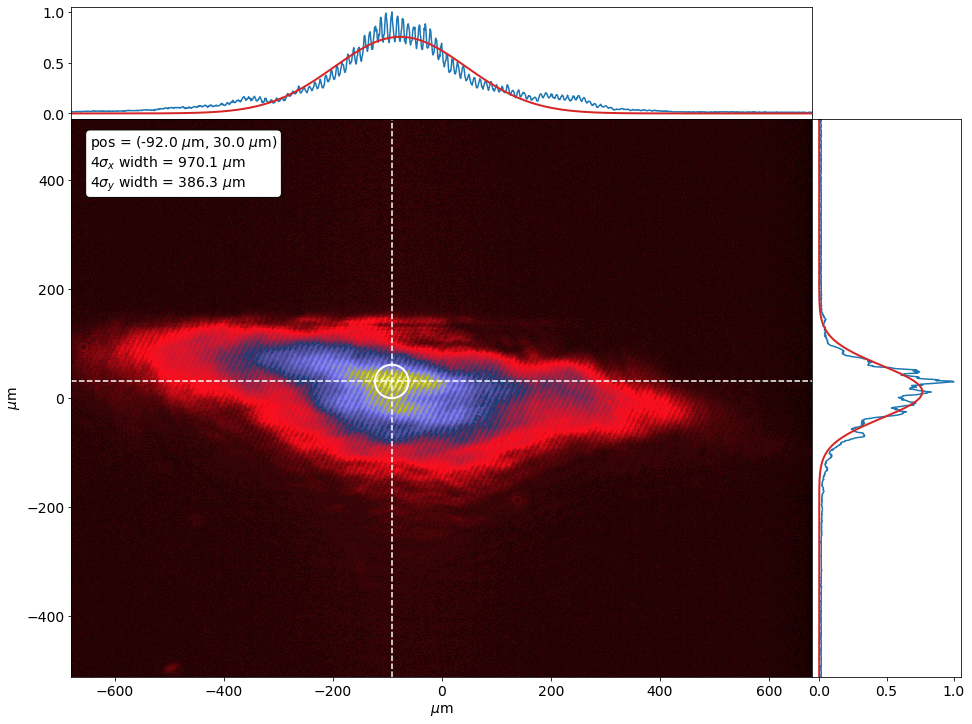

In [9]:
plot_BCN106N(im, 3, scale_xy=1, origin_center = True)

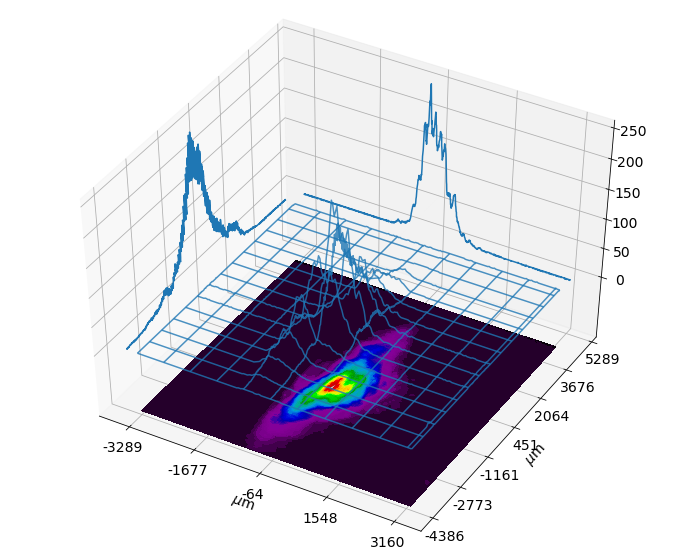

In [10]:
scaling = 5
im_resized = Image.fromarray(np.uint8(im))
im_resized = im_resized.resize( (im_resized.width // scaling, im_resized.height // scaling))
xx, yy = np.mgrid[0:np.array(im_resized).shape[0], 0:np.array(im_resized).shape[1]]

fig = plt.figure(figsize = (12,10))
ax = fig.gca(projection = '3d')

ax.plot_wireframe(xx, yy, np.array(im_resized), rstride = 100//scaling, cstride = 100//scaling, alpha =0.8)

cset = ax.contourf(xx, yy, np.array(im_resized), zdir='z', offset=-100,cmap='nipy_spectral', levels = 500//scaling)
ax.plot(np.linspace(0, np.array(im_resized).shape[1], im.shape[1]), im[center_of_mass[0], :], zdir = 'x', zs = -40/scaling, color = 'C0')
ax.plot(np.linspace(0, np.array(im_resized).shape[0], im.shape[0]), im[:, center_of_mass[1]], zdir = 'y', zs = (1400+40)/scaling, color = 'C0')

ax.set_zlim(-100,im.max())
ax.view_init(45, None)

ax.set_zticks([0,50,100,150,200,250])

ax.set_xticklabels([int((tick-np.array(im_resized).shape[0]/2)*scaling*6.45) for tick in ax.get_xticks()])
ax.set_yticklabels([int((tick-np.array(im_resized).shape[1]/2)*scaling*6.45) for tick in ax.get_yticks()])
ax.set_xlabel(r'$\mu$m')
ax.set_ylabel(r'$\mu$m')
set_fontsize(ax, 14)